<a href="https://colab.research.google.com/github/chiss7/nxor-tensorflow/blob/main/NXOR1/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/MyDrive/Colab Notebooks/NXOR - Tensorflow 2 (no keras)/utils.py' '/content'
!cp '/content/drive/MyDrive/Colab Notebooks/NXOR - Tensorflow 2 (no keras)/optimizers.py' '/content'

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils import Model
from optimizers import GradientDescent, Momentum, Adam

# Refreshing import to changes in utils.py
%load_ext autoreload
%autoreload 2

In [3]:
# IMPORT DATA
x = np.array([(0, 0, 1, 1), (0, 1, 0, 1)], dtype=np.float32)
y = np.array([1, 0, 0, 1], dtype=np.float32)

In [4]:
# (features, training examples)
x.shape

(2, 4)

In [5]:
# HYPER PARAMETERS
lr = 1e-3
arch = [20, 10, 5]
num_epochs = 1000

model = Model(arch)
optimizer = Adam(learning_rate=lr)
# new_bin_cross_entropy = tf.keras.losses.BinaryCrossentropy()

loss_list = []
accuracy_list = []

print("----------------------------------------")
print(model.title)
print(optimizer.title)
print("----------------------------------------")

# TRAIN MODEL
for epoch in range(num_epochs):
  # Gradients
  with tf.GradientTape() as t:
    # Loss
    loss = model.compute_loss(model(x), y)
    #loss = new_bin_cross_entropy(y, model(x))

  grads = t.gradient(loss, model.Variables)

  loss_list.append(loss)

  # Apply Gradients (optimizer)
  model.Variables = optimizer.apply_gradients(model.Variables, grads)

  # Accuracy
  accuracy = model.compute_accuracy(model(x), y)
  accuracy_list.append(accuracy)

  if (epoch % (num_epochs // 10) == 0):
    # Show Accuracy and Loss
    print(f"Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}")

print(model(x))

----------------------------------------
Model architecture -> input[2], hidden[20, 10, 5], output[1]
Adam: learning rate = 0.001
----------------------------------------
Epoch: 0, Loss: 0.2325, Accuracy: 0.50
Epoch: 100, Loss: 0.2049, Accuracy: 0.75
Epoch: 200, Loss: 0.1744, Accuracy: 0.75
Epoch: 300, Loss: 0.1429, Accuracy: 0.75
Epoch: 400, Loss: 0.1069, Accuracy: 1.00
Epoch: 500, Loss: 0.0697, Accuracy: 1.00
Epoch: 600, Loss: 0.0424, Accuracy: 1.00
Epoch: 700, Loss: 0.0246, Accuracy: 1.00
Epoch: 800, Loss: 0.0143, Accuracy: 1.00
Epoch: 900, Loss: 0.0090, Accuracy: 1.00
tf.Tensor([[0.9468957  0.08552701 0.06922013 0.90184456]], shape=(1, 4), dtype=float32)


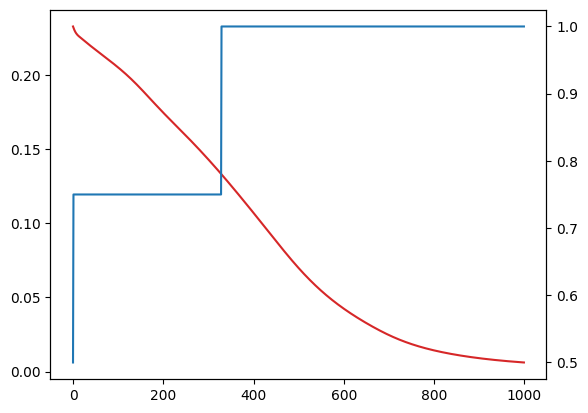

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list, "tab:red")
ax2 = ax1.twinx()
ax2.plot(accuracy_list, "tab:blue")

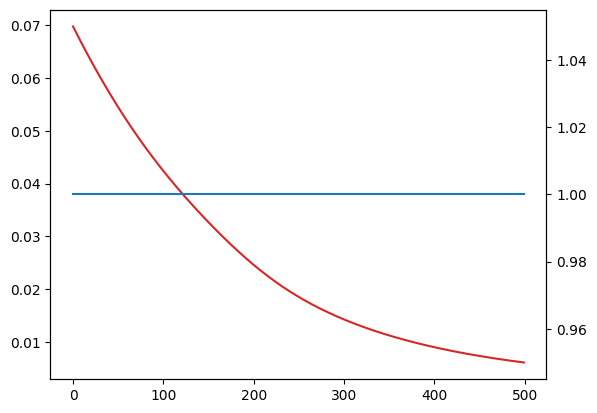

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(loss_list[-500:], "tab:red")
ax2 = ax1.twinx()
ax2.plot(accuracy_list[-500:], "tab:blue")